**KNearestNeighbor applied to Social_Network_Ads.csv**

In [1]:
import warnings
import pandas as pd
from google.colab import drive
warnings.simplefilter(action='ignore', category=FutureWarning)

drive.mount('/content/drive')
!cp -r /content/drive/My\ Drive/Learn/* ./
!ls

df = pd.read_csv("Social_Network_Ads.csv")
X1 = df.iloc[:, [2,3]].values
y1 = df.iloc[:, 4].values

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
drive			Knn-Classifier_First.ipynb  Social_Network_Ads.csv
KNearestNeighbor.ipynb	sample_data


**look at types in Dataset**

In [2]:
print(df.head())
print(df.info())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


**Gender needs to be One Hot Encoded, but for now we will look for missing data and visualize the data.**

In [3]:
df.isnull().values.any()

False

**No NaN's in the data, may be other types of NaN's**

In [4]:
print(df.Age.unique())
print(df.EstimatedSalary.unique())
print(df.Gender.unique())

[19 35 26 27 32 25 20 18 29 47 45 46 48 49 31 21 28 33 30 23 24 22 59 34
 39 38 37 42 40 36 41 58 55 52 60 56 53 50 51 57 44 43 54]
[ 19000  20000  43000  57000  76000  58000  84000 150000  33000  65000
  80000  52000  86000  18000  82000  25000  26000  28000  29000  22000
  49000  41000  23000  30000  74000 137000  16000  44000  90000  27000
  72000  31000  17000  51000 108000  15000  79000  54000 135000  89000
  32000  83000  55000  48000 117000  87000  66000 120000  63000  68000
 113000 112000  42000  88000  62000 118000  85000  81000  50000 116000
 123000  73000  37000  59000 149000  21000  35000  71000  61000  75000
  53000 107000  96000  45000  47000 100000  38000  69000 148000 115000
  34000  60000  70000  36000  39000 134000 101000 130000 114000 142000
  78000 143000  91000 144000 102000 126000 133000 147000 104000 146000
 122000  97000  95000 131000  77000 125000 106000 141000  93000 138000
 119000 105000  99000 129000  46000  64000 139000]
['Male' 'Female']


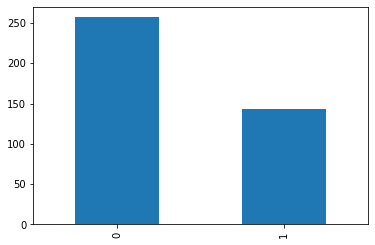

In [5]:
pd.value_counts(df['Purchased']).plot.bar()

**We are dealing with an imbalanced dataset**

In [6]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<Figure size 1440x1440 with 0 Axes>

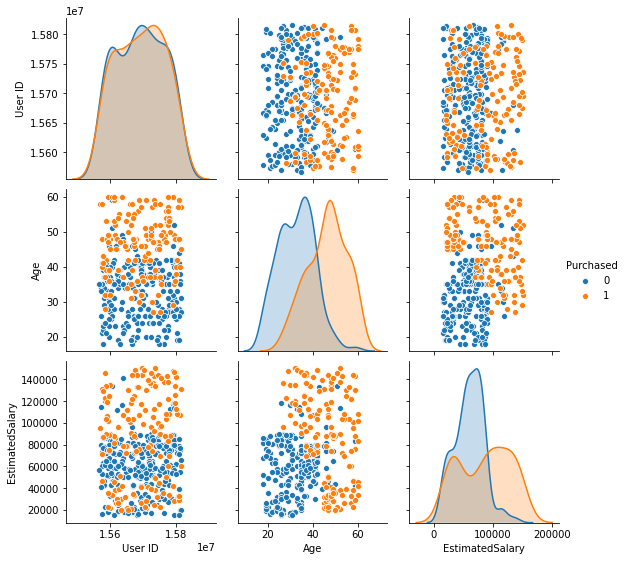

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.pairplot(df[['User ID', 'Gender','Age','EstimatedSalary','Purchased']], 
                      hue = 'Purchased', diag_kind = 'kde')

**Gender needs to be One Hot Encoded for the algorithms, also User ID is probably not relevant, i'll let the numbers tell me**

In [8]:
df = pd.concat([df.drop('Gender', axis=1), pd.get_dummies(df['Gender'])], axis=1)
df.head()

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


**Could drop the Female or Male row, but not totally necessary**

In [9]:
df = df.drop(['Male'], axis=1)
df.head()

,User ID,Age,EstimatedSalary,Purchased,Female
0,15624510,19,19000,0,0
1,15810944,35,20000,0,0
2,15668575,26,43000,0,1
3,15603246,27,57000,0,1
4,15804002,19,76000,0,0


In [10]:
import numpy as np

importances = df.drop('Purchased', axis=1).apply(lambda x: x.corr(df.Purchased))
indices = np.argsort(importances)
print(importances[indices])

User ID            0.007120
Female             0.042469
EstimatedSalary    0.362083
Age                0.622454
dtype: float64


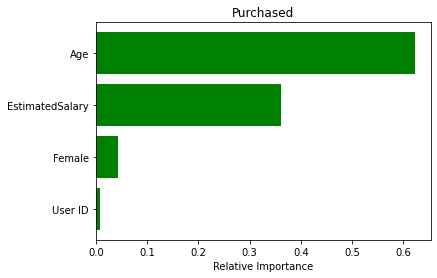

In [11]:
names=list(df.drop('Purchased',axis=1).columns)
plt.title('Purchased')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**User ID is close to zero, meaning very little relevance, Female is not much better. We will keep Female and drop User ID.**

In [12]:
df = df.drop('User ID', axis=1)
df.head()

,Age,EstimatedSalary,Purchased,Female
0,19,19000,0,0
1,35,20000,0,0
2,26,43000,0,1
3,27,57000,0,1
4,19,76000,0,0


**Let's see correlation of features with each other.**

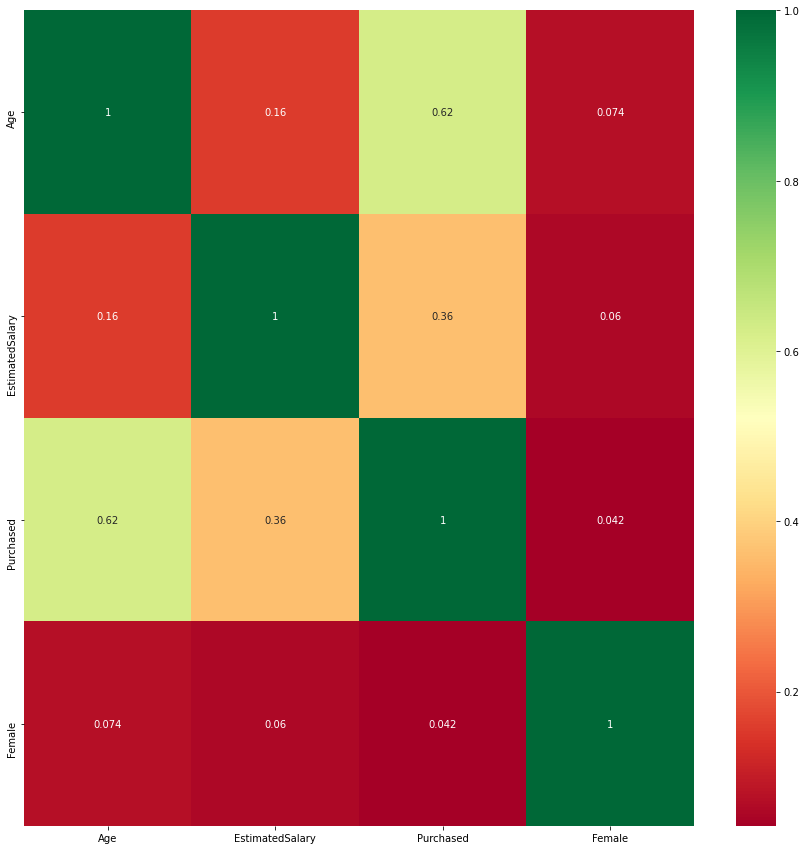

In [13]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Scaling is needed due to different unit measurements**

In [14]:
from sklearn import preprocessing

df[['Age', 'EstimatedSalary']] = preprocessing.MinMaxScaler().fit_transform(df[['Age', 'EstimatedSalary']])
df.head()

,Age,EstimatedSalary,Purchased,Female
0,0.023810,0.029630,0,0
1,0.404762,0.037037,0,0
2,0.190476,0.207407,0,1
3,0.214286,0.311111,0,1
4,0.023810,0.451852,0,0


**Let's see a baseline with KNearestNeighbors**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier()
X = df.drop('Purchased',axis=1)
y = df.Purchased
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, shuffle = True, random_state = 5, test_size = 0.3)
print("Cross Validation score: {}".format(np.mean(cross_val_score(model, X_train, y_train, cv=5))))

Cross Validation score: 0.9142857142857143


**That is a good accuracy, but accuracy can be sometimes be missleading in classification problems. Let's test the model on other metrics.**

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("roc_auc_score: {}".format(roc_auc_score(y_test,predicted)))
print("precision_score: {}".format(precision_score(y_test, predicted)))
print("recall_score: {}".format(recall_score(y_test, predicted)))
print("f1_score: {}".format(f1_score(y_test, predicted)))
print("accuracy_score: {}".format(accuracy_score(y_test, predicted)))
print("classification_report: {}".format(classification_report(y_test, predicted)))

roc_auc_score: 0.8834189066747207
precision_score: 0.8085106382978723
recall_score: 0.8837209302325582
f1_score: 0.8444444444444444
accuracy_score: 0.8833333333333333
classification_report:               precision    recall  f1-score   support

           0       0.93      0.88      0.91        77
           1       0.81      0.88      0.84        43

    accuracy                           0.88       120
   macro avg       0.87      0.88      0.88       120
weighted avg       0.89      0.88      0.88       120



**Lets see the decision boundry**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


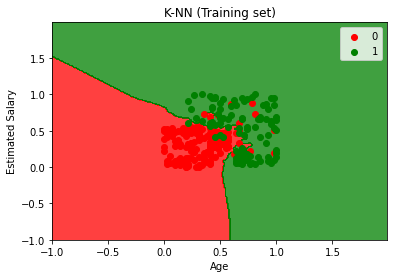

In [28]:

from matplotlib.colors import ListedColormap
X_set, y_set = X_train.drop('Female',axis=1).values, y_train.values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
model.fit(X_set,y_set)
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**looks like an okay f1 score, lets see if SMOTE will help since the dataset is imbalanced**

In [18]:
from imblearn.over_sampling import SMOTE
balanced_X_train, balanced_y_train = SMOTE().fit_resample(X_train, y_train)
model_S = KNeighborsClassifier()
print("Cross Validation score: {}".format(np.mean(cross_val_score(model_S, balanced_X_train, balanced_y_train, cv=5))))

Cross Validation score: 0.9111111111111111


In [19]:
model_S.fit(balanced_X_train, balanced_y_train)
predicted = model_S.predict(X_test)
print("roc_auc_score: {}".format(roc_auc_score(y_test,predicted)))
print("precision_score: {}".format(precision_score(y_test, predicted)))
print("recall_score: {}".format(recall_score(y_test, predicted)))
print("f1_score: {}".format(f1_score(y_test, predicted)))
print("accuracy_score: {}".format(accuracy_score(y_test, predicted)))
print("classification_report: {}".format(classification_report(y_test, predicted)))

roc_auc_score: 0.8820598006644519
precision_score: 0.78
recall_score: 0.9069767441860465
f1_score: 0.8387096774193548
accuracy_score: 0.875
classification_report:               precision    recall  f1-score   support

           0       0.94      0.86      0.90        77
           1       0.78      0.91      0.84        43

    accuracy                           0.88       120
   macro avg       0.86      0.88      0.87       120
weighted avg       0.88      0.88      0.88       120



**Seems to do worse with SMOTE, so even though the dataset is imbalanced, using a sampler does not help in all cases, possibly where the decision boundry is well defined**